In [5]:
#import the necessary libraries and frameworks
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [6]:
#load the data into a dataframe
df = pd.read_csv('breast-cancer.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#checking the distribution of benign and malignant variables
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
#Convert Benign(B) and Malignant(M) data into binary numbers
encoder = LabelEncoder()
diagnosis_encoded = encoder.fit_transform(df['diagnosis'])


In [11]:
#Adding the binary encoded column into the dataframe
df['outcome'] = diagnosis_encoded
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outcome
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outcome
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df['outcome'].value_counts()

outcome
0    357
1    212
Name: count, dtype: int64

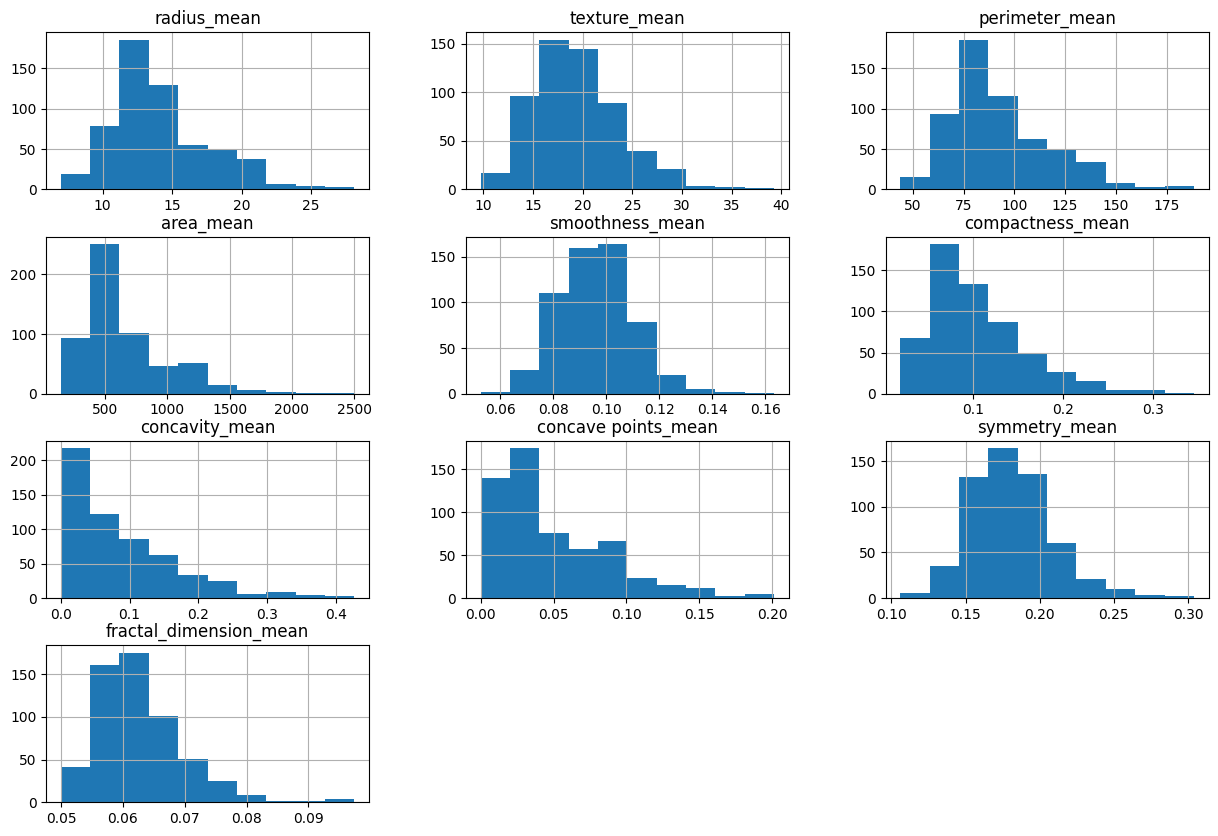

In [14]:
#Plotting the features in graphs
data = df.iloc[:,1:12]
data.hist(bins = 10,figsize = (15,10),grid = True);

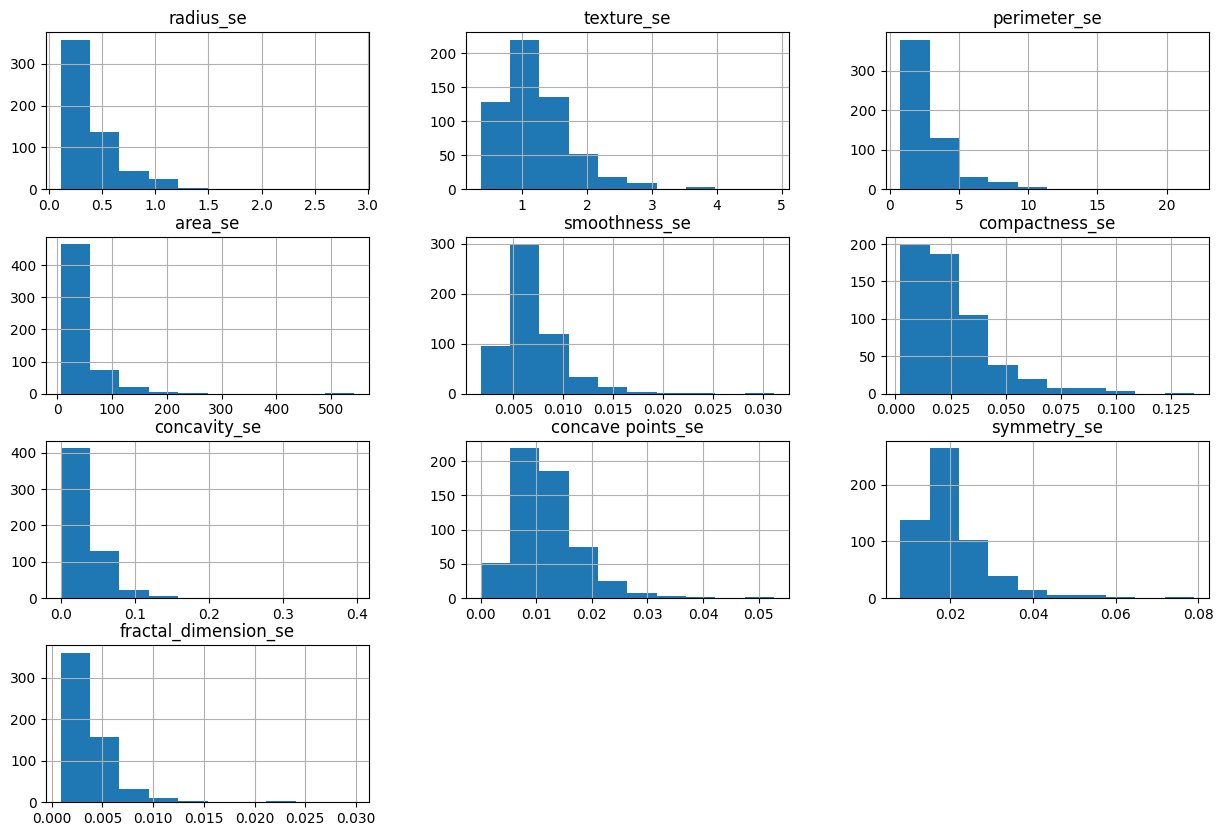

In [15]:
data = df.iloc[:,12:22]
data.hist(bins = 10,figsize = (15,10),grid = True);

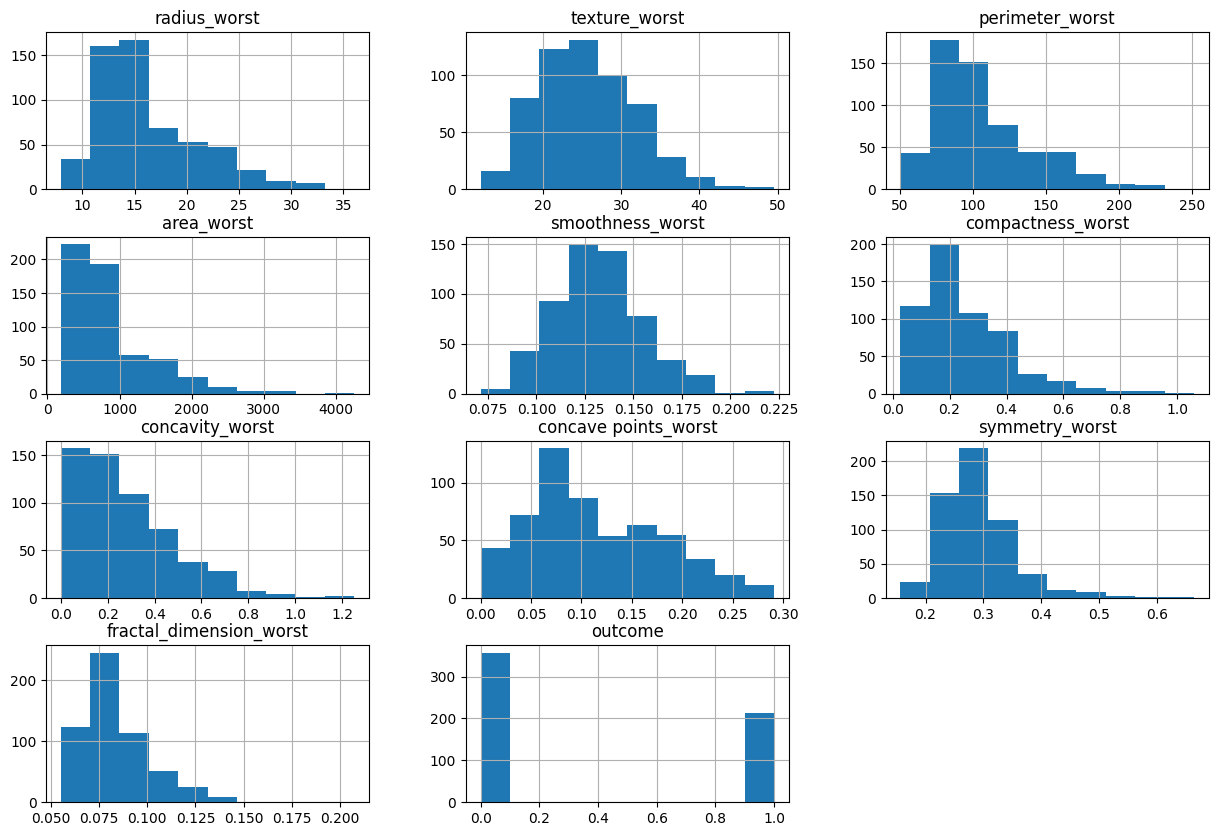

In [16]:
data = df.iloc[:,22:]
data.hist(bins = 10,figsize = (15,10),grid = True);


In [17]:
#Storing all the necessary parameters into X dataframe
X = df.drop(['outcome','id','diagnosis'], axis = 1)
Y = df['outcome']

X,Y

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      compactness_mean  concavity_mean  concave po

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
#Checking on the dimensions of the dataset
print(X.shape)
print(Y.shape)


(569, 30)
(569,)


In [20]:
#Splitting the data inito train, corss-validation and test sets
x_train,x_,y_train,y_ = train_test_split(X,Y,test_size = 0.40, random_state = 1)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size = 0.50, random_state = 1)

del x_,y_

print(x_train.shape)
print(y_train.shape)
print(x_cv.shape)
print(x_test.shape)



(341, 30)
(341,)
(114, 30)
(114, 30)


In [21]:
#Standardizing the data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

[[ 2.45523767  0.56480743  2.3364474  ...  1.7504593   1.23570672
   0.4469218 ]
 [ 0.44175802  0.98434205  0.43397348 ... -0.0638393  -0.10977641
  -1.25478688]
 [ 0.1839675   0.67243673  0.37108178 ...  1.94120463 -0.01145264
   1.83352098]
 ...
 [ 0.80809192  1.10954347  0.84670026 ...  1.08950455  0.75961269
   2.91322579]
 [-0.05211435  0.39128265 -0.11279124 ... -0.54099836 -1.1154388
  -0.47434807]
 [-0.32347279 -0.23033147 -0.39501774 ... -0.97719892 -1.52770864
  -1.32402881]]


In [22]:
#Seeting the layers of the neural network
tf.random.set_seed(3)
model = tf.keras.Sequential(
    [
        
        tf.keras.layers.Dense(units = 16, activation = 'relu', input_shape = (30,)),
        tf.keras.layers.Dense(units = 16,activation = 'relu'),
        tf.keras.layers.Dense(units = 2, activation = 'sigmoid')
    ]
)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 802 (3.13 KB)

 Trainable params: 802 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Compiling and training the neural network
model.compile(
    loss =tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

history = model.fit(
    x_train_scaled,y_train,
    epochs = 20,
    validation_data = (x_cv_scaled,y_cv)
    
)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3273 - loss: 1.3976 - val_accuracy: 0.4561 - val_loss: 1.0770
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4621 - loss: 1.0530 - val_accuracy: 0.6053 - val_loss: 0.8706
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6075 - loss: 0.8198 - val_accuracy: 0.6842 - val_loss: 0.7261
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7336 - loss: 0.6593 - val_accuracy: 0.7193 - val_loss: 0.6208
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8220 - loss: 0.5376 - val_accuracy: 0.7719 - val_loss: 0.5390
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8569 - loss: 0.4442 - val_accuracy: 0.8158 - val_loss: 0.4741
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8829 - loss: 0.3737 - val_accuracy: 0.8421 - val_loss: 0.4233
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8856 - loss: 0.3175 - val_accuracy: 0.8596 - val_loss

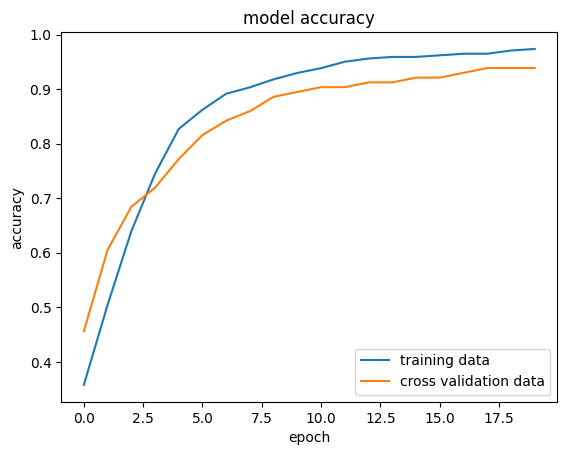

In [25]:
#Plotting the accuracy and loss of the training and the cross-validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['training data','cross validation data'], loc = 'lower right')
plt.show()

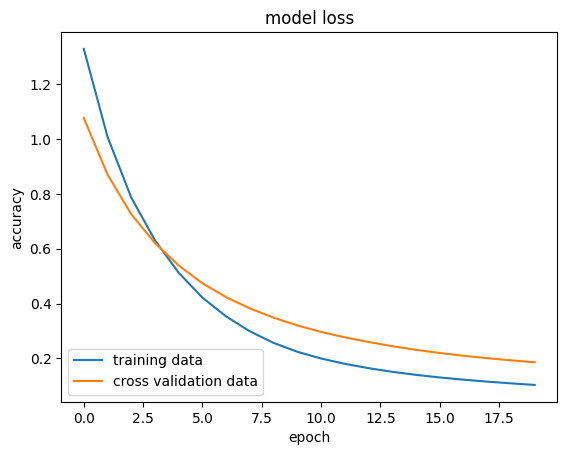

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model loss')
plt.legend(['training data','cross validation data'], loc = 'lower left')
plt.show()

In [27]:
#Calculating the accuract of the model on the test data
loss, accuracy = model.evaluate(x_test_scaled, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9338 - loss: 0.1547  


In [28]:
#Predicting the model and getting the prediction probabibilties
prediction  = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [29]:
prediction.shape

(114, 2)

In [30]:
x_test_scaled.shape

(114, 30)

In [31]:
prediction

array([[0.8928625 , 0.11180029],
       [0.7713853 , 0.13308823],
       [0.8625171 , 0.04463022],
       [0.62448967, 0.29222012],
       [0.42170587, 0.9204547 ],
       [0.36408928, 0.97242695],
       [0.6421033 , 0.52010864],
       [0.6799244 , 0.31933564],
       [0.9561884 , 0.0093604 ],
       [0.85401124, 0.11786506],
       [0.77245325, 0.6973718 ],
       [0.85716176, 0.11073136],
       [0.18895616, 0.99700445],
       [0.50407577, 0.83551913],
       [0.8829658 , 0.06010301],
       [0.7787564 , 0.9694274 ],
       [0.78909695, 0.12049047],
       [0.8931228 , 0.06590986],
       [0.29079944, 0.99306273],
       [0.68856835, 0.47116593],
       [0.7421239 , 0.1376384 ],
       [0.8605262 , 0.05910815],
       [0.7840281 , 0.05822076],
       [0.8118273 , 0.12354219],
       [0.6328754 , 0.19619389],
       [0.48183584, 0.9443024 ],
       [0.6706099 , 0.25191954],
       [0.7911995 , 0.13913245],
       [0.8539002 , 0.08610898],
       [0.69081724, 0.2517297 ],
       [0.

In [32]:
#Converting the prediction probabilities into class labels
prediction_labels = [np.argmax(i) for i in prediction ]
prediction_labels

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0]

In [33]:
#Checking on the accuracy of the prediction using confusion matrix
score = accuracy_score(y_test, prediction_labels)
score

0.9385964912280702

In [34]:
confusion_matrix(y_test, prediction_labels)

array([[78,  2],
       [ 5, 29]], dtype=int64)

In [35]:
cm = classification_report(y_test,prediction_labels)
print('Classification report: \n' ,cm)

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        80
           1       0.94      0.85      0.89        34

    accuracy                           0.94       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.94      0.94      0.94       114



In [36]:
#Building the predictive system

input_data = (18.35,11.2472,126.33,998.7895,0.178546,0.25369,0.2043,0.1368,0.2411,0.07812,0.6784,1.3527,4.33, 34.23,0.0067,0.0391,0.06335,0.00372,0.0197,0.0043,25.47,18.16,166.98,1473.25,0.1563,0.5547,0.4315,0.1998,0.4231,0.09112)
print(len(input_data))

#Loading the input data as a dataframe
data = pd.DataFrame([input_data])
print(data)

#Standardizing data
scaled_data = scaler.transform(data)

predict = model.predict(scaled_data)
print(predict)

predict_score = np.argmax(predict)

#Deciding whether the tumor is benign or malignant according to the binary output
if predict_score == 0:
    print('Tumor is benign')

else:
    print('Tumor is malignant')

30
      0        1       2         3         4        5       6       7   \
0  18.35  11.2472  126.33  998.7895  0.178546  0.25369  0.2043  0.1368   

       8        9   ...     20     21      22       23      24      25  \
0  0.2411  0.07812  ...  25.47  18.16  166.98  1473.25  0.1563  0.5547   

       26      27      28       29  
0  0.4315  0.1998  0.4231  0.09112  

[1 rows x 30 columns]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.47713083 0.98950124]]
Tumor is malignant


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
model.save('model.h5')